In [22]:
from PIL import Image, ImageDraw
from typing import List, Tuple
import itertools
import random
from IPython.display import display

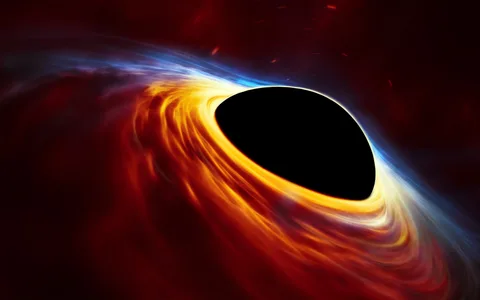

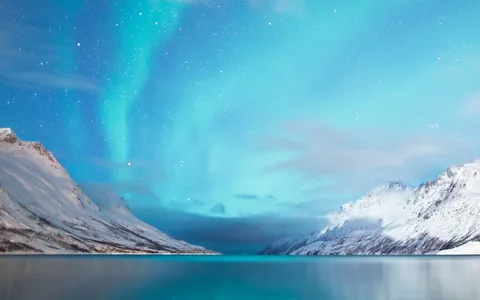

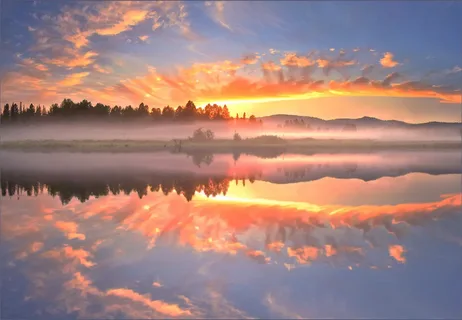

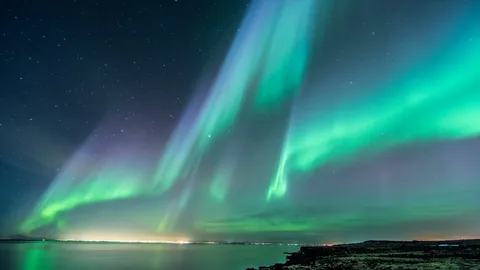

In [71]:
# Загрузка изображений
image1 = Image.open("image_black_hole.webp")
image2 = Image.open("image_mountains.webp")
image3 = Image.open("image_sun.webp")
image4 = Image.open("image_north.webp")
images = [image1, image2, image3, image4]
display(image1)
display(image2)
display(image3)
display(image4)

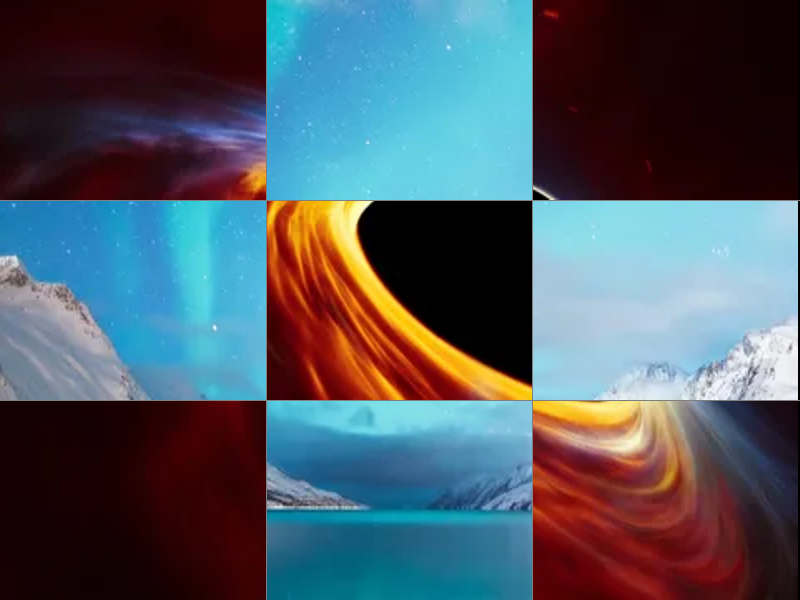

In [42]:
from PIL import Image, ImageDraw
from typing import List, Tuple
import itertools
                            #Изображения получаем, какой размер, какие изображения используем, столбцы и колонки, показывать ли сетку, цвет сетки
def create_mixed_table_image(images: List[Image.Image], size: Tuple[int, int], sequence: str, rows: int, cols: int, show_grid: bool = False, grid_color: str = "black") -> Image.Image:
    # Проверяем, что количество изображений в списке находится в диапазоне от 2 до 4
    if not 2 <= len(images) <= 4:
        raise ValueError("The list of images must contain between 2 and 4 images.")
    
    width, height = size
    
    # Вычисляем размер ячеек в таблице на основе количества строк и столбцов
    cell_width, cell_height = width // cols, height // rows
    
    # Создаем новое изображение RGB с указанными размерами
    output_image = Image.new("RGB", size)
    
    # Создаем бесконечный цикл для последовательности изображений
    sequence_cycle = itertools.cycle(sequence)
    
    # Создаем объект для рисования на выходном изображении
    draw = ImageDraw.Draw(output_image)
    
    # Индекс предыдущего изображения, чтобы избежать повторений в соседних ячейках
    prev_img_index = -1

    # Проходим по каждой строке и столбцу таблицы
    for row in range(rows):
        for col in range(cols):
            # Пока не будет найдено новое изображение, отличное от предыдущего
            while True:
                # Получаем индекс изображения из циклической последовательности
                img_index = int(next(sequence_cycle)) - 1
                
                # Проверяем, чтобы это изображение не совпадало с предыдущим
                if img_index != prev_img_index:
                    break
            
            # Обновляем индекс предыдущего изображения
            prev_img_index = img_index

            # Извлекаем текущее изображение по индексу
            img = images[img_index]
            
            # Извлекаем размеры исходного изображения
            orig_width, orig_height = img.size
            
            # Вычисляем координаты обрезки текущей ячейки в таблице
            crop_width = orig_width // cols
            crop_height = orig_height // rows
            
            crop_box = (
                (col % cols) * crop_width,                 # левая координата x
                (row % rows) * crop_height,                # верхняя координата y
                (col % cols) * crop_width + crop_width,    # правая координата x
                (row % rows) * crop_height + crop_height   # нижняя координата y
            )
            
            # Обрезаем и изменяем размер текущего изображения для текущей ячейки
            crop_img = img.crop(crop_box).resize((cell_width, cell_height))
            
            # Вставляем обрезанное изображение в выходное изображение в позицию текущей ячейки
            output_image.paste(crop_img, (col * cell_width, row * cell_height))
    
    # Отрисовываем сетку, если это указано
    if show_grid:
        for i in range(1, cols):
            draw.line([(i * cell_width, 0), (i * cell_width, height)], fill=grid_color)
        for i in range(1, rows):
            draw.line([(0, i * cell_height), (width, i * cell_height)], fill=grid_color)
    
    # Возвращаем сформированное смешанное изображение
    return output_image


# Создание изображения в виде таблицы
table_image = create_mixed_table_image(images, (800, 600), "12", 3, 3, show_grid=True, grid_color="grey")

# Отображение изображения
display(table_image)

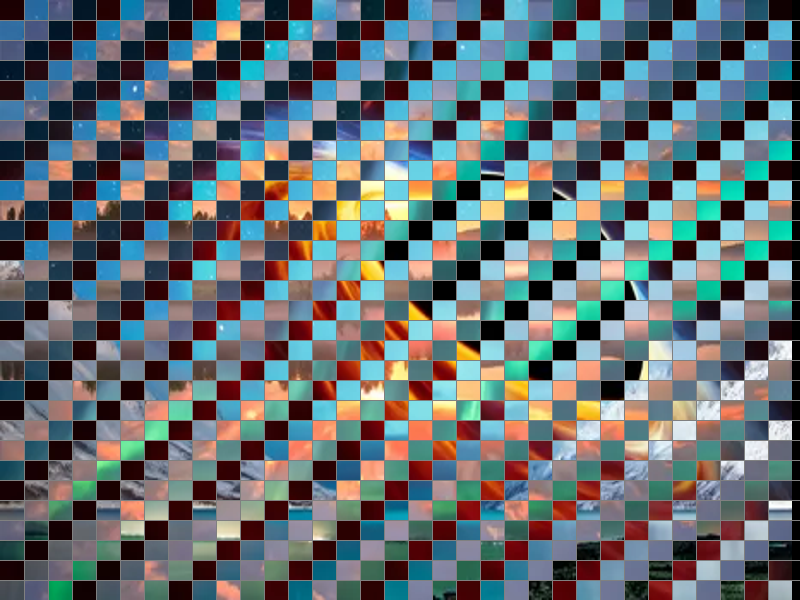

In [43]:
# Создание изображения в виде таблицы
table_image = create_mixed_table_image(images, (800, 600), "1234", 30, 33, show_grid=True, grid_color="grey")

# Отображение изображения
display(table_image)

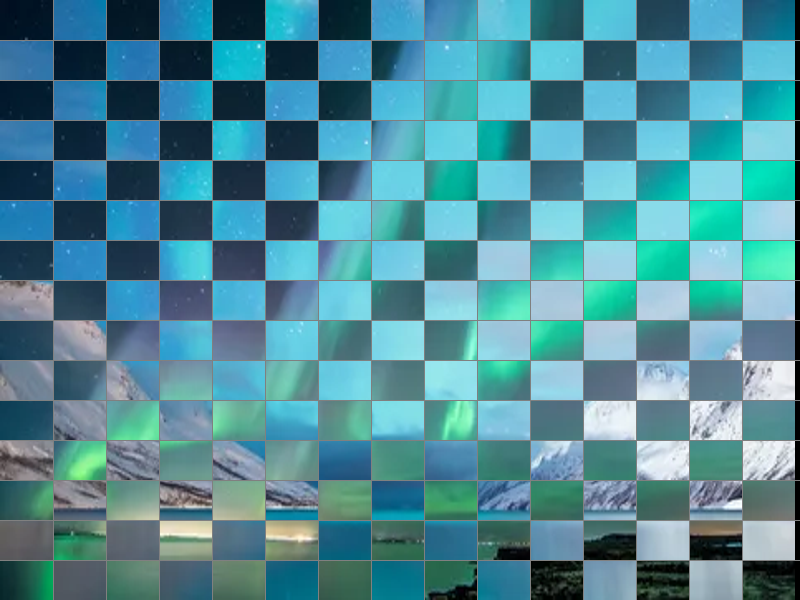

In [66]:
# Создание изображения в виде таблицы
table_image = create_mixed_table_image(images, (800, 600), "42", 15, 15, show_grid=True, grid_color="grey")

# Отображение изображения
display(table_image)

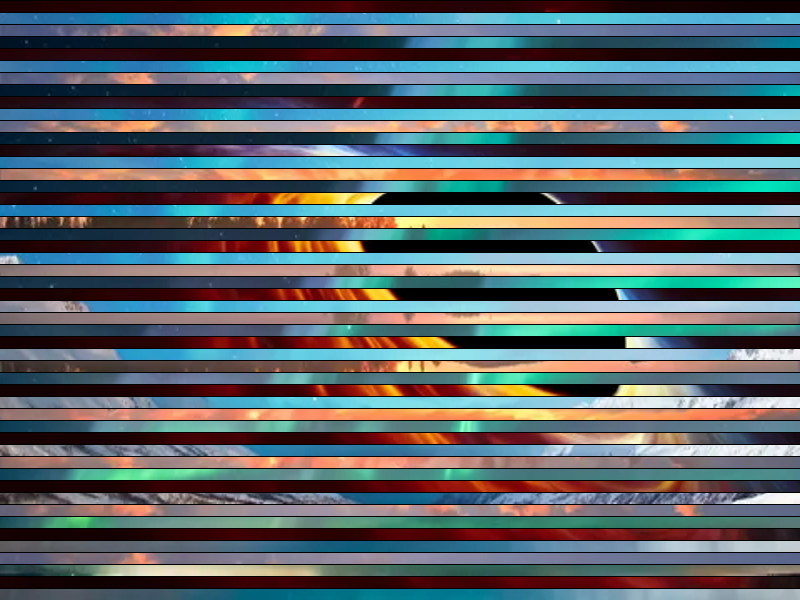

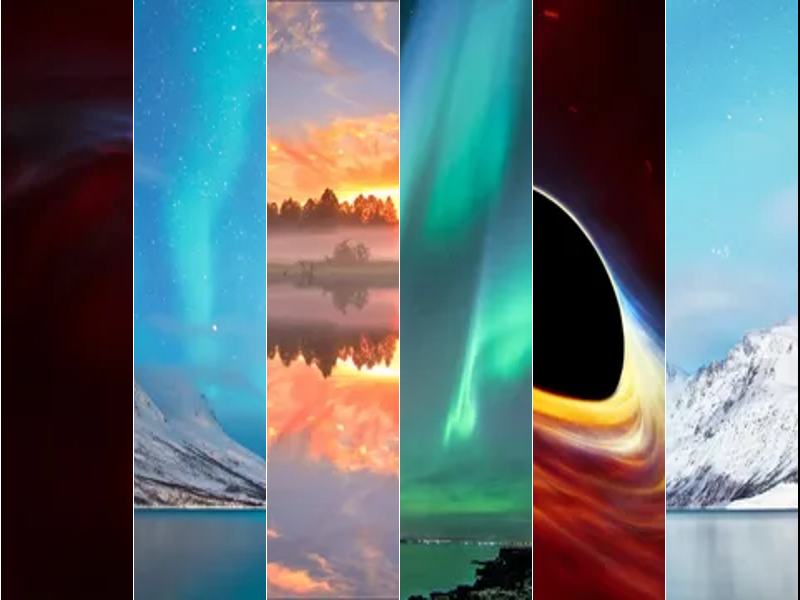

In [74]:
from PIL import Image, ImageDraw
from typing import List, Tuple
import itertools

def create_mixed_striped_image(images: List[Image.Image], size: Tuple[int, int], sequence: str, stripes: int, show_grid: bool = False, grid_color: str = "black", stripe_type: int = 1) -> Image.Image:
    # Проверяем, что количество изображений в списке находится в диапазоне от 2 до 4
    if not 2 <= len(images) <= 4:
        raise ValueError("The list of images must contain between 2 and 4 images.")
    
    # Извлекаем ширину и высоту из размера выходного изображения
    width, height = size
    
    # Создаем новое изображение RGB с указанными размерами
    output_image = Image.new("RGB", size)
    
    # Создаем бесконечный цикл для последовательности изображений
    sequence_cycle = itertools.cycle(sequence)
    
    # Создаем объект для рисования на выходном изображении
    draw = ImageDraw.Draw(output_image)
    
    # Обработка горизонтальных полос
    if stripe_type == 1: #1 принял за горизонтальное
        # Вычисляем высоту каждой полосы
        stripe_height = height // stripes
        
        # Проходим по каждой полосе
        for stripe in range(stripes):
            # Получаем индекс текущего изображения из циклической последовательности
            img_index = int(next(sequence_cycle)) - 1
            
            # Извлекаем текущее изображение по индексу
            img = images[img_index]
            
            # Определяем координаты обрезки для текущей полосы
            crop_box = (
                0,                                       # левая координата x
                stripe * (img.height // stripes),        # верхняя координата y
                img.width,                               # правая координата x
                (stripe + 1) * (img.height // stripes)   # нижняя координата y
            )
            
            # Обрезаем изображение и изменяем его размер до размеров текущей полосы
            img_cropped = img.crop(crop_box).resize((width, stripe_height))
            
            # Вставляем обрезанное изображение в выходное изображение в позицию текущей полосы
            output_image.paste(img_cropped, (0, stripe * stripe_height))
            
            # Отрисовываем линии сетки, если это указано
            if show_grid:
                draw.line([0, stripe * stripe_height, width, stripe * stripe_height], fill=grid_color)
    
    # Обработка вертикальных полос
    elif stripe_type == 2:
        # Вычисляем ширину каждой полосы
        stripe_width = width // stripes
        
        # Проходим по каждой полосе
        for stripe in range(stripes):
            # Получаем индекс текущего изображения из циклической последовательности
            img_index = int(next(sequence_cycle)) - 1
            
            # Извлекаем текущее изображение по индексу
            img = images[img_index]
            
            # Определяем координаты обрезки для текущей полосы
            crop_box = (
                stripe * (img.width // stripes),    # левая координата x
                0,                                  # верхняя координата y
                (stripe + 1) * (img.width // stripes),  # правая координата x
                img.height                          # нижняя координата y
            )
            
            # Обрезаем изображение и изменяем его размер до размеров текущей полосы
            img_cropped = img.crop(crop_box).resize((stripe_width, height))
            
            # Вставляем обрезанное изображение в выходное изображение в позицию текущей полосы
            output_image.paste(img_cropped, (stripe * stripe_width, 0))
            
            # Отрисовываем линии сетки, если это указано
            if show_grid:
                draw.line([stripe * stripe_width, 0, stripe * stripe_width, height], fill=grid_color)
    
    # В случае неправильного типа полосы генерируем исключение
    else:
        raise ValueError("stripe_type must be either 1 (horizontal) or 2 (vertical)")
    
    # Возвращаем сформированное смешанное изображение
    return output_image

# Пример использования
striped_image_h = create_mixed_striped_image(images, (800, 600), "1234", 50, show_grid=True, grid_color="black", stripe_type=1)
display(striped_image_h)

striped_image_v = create_mixed_striped_image(images, (800, 600), "1234", 6, show_grid=True, grid_color="white", stripe_type=2)
display(striped_image_v)

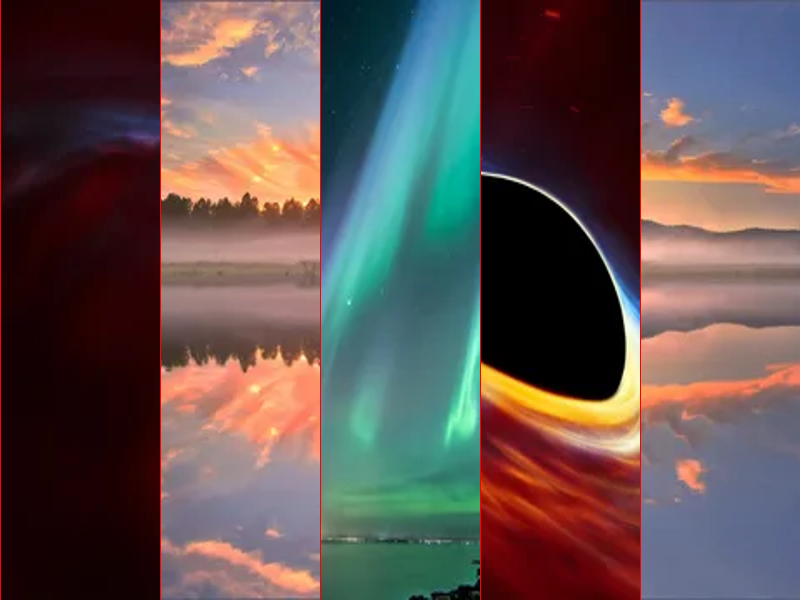

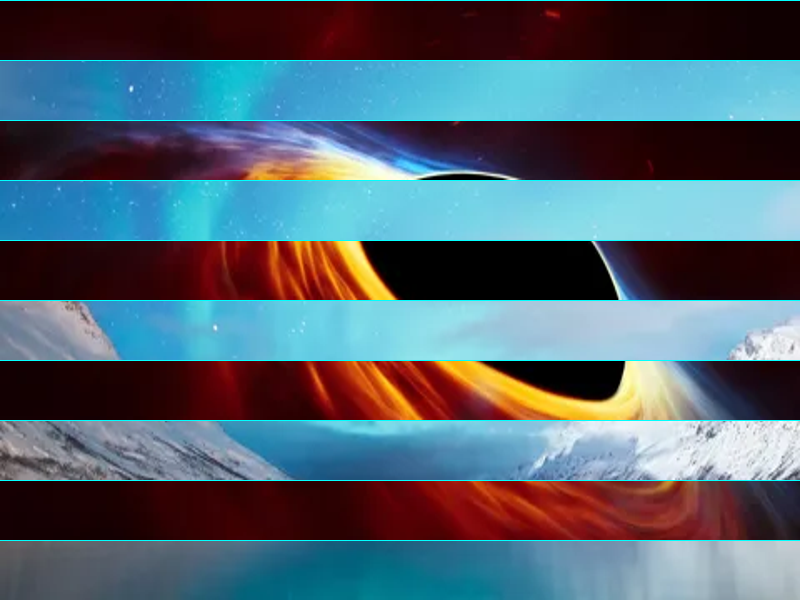

In [75]:
# Пример использования
striped_image_h = create_mixed_striped_image(images, (800, 600), "134", 5, show_grid=True, grid_color="red", stripe_type=2)
display(striped_image_h)

striped_image_v = create_mixed_striped_image(images, (800, 600), "12", 10, show_grid=True, grid_color="cyan", stripe_type=1)
display(striped_image_v)